In [1]:
import pymc
import numpy as np
import pandas as pd

In [2]:
bills = pd.read_csv("BillsMXc.csv").sort_values("Year", axis=0)

In [3]:
%matplotlib inline
# alpha = pymc.Normal("alpha", mu=0, tau=0.001)
beta1 = pymc.Normal("beta_1", mu=0, tau=0.001)
beta2 = pymc.Normal("beta_2", mu=0, tau=0.001)
beta3 = pymc.Normal("beta_3", mu=0, tau=0.001)
beta4 = pymc.Normal("beta_4", mu=0, tau=0.001)
beta5 = pymc.Normal("beta_5", mu=0, tau=0.001)
x1 = bills.x20
x2 = bills.x50
x3 = bills.x100 
x4 = bills.x200
x5 = bills.x500

@pymc.deterministic
def θ(β1=beta1, β2=beta2, β3=beta3, β4=beta4, β5=beta5):
    """η = β_1 + β_2*x2 + β_3*x3 + β_4*x4 + β_5*x5 """
    #x1 = bills.x20, x2 = bills.x50, x3 = bills.x100, x4 = bills.x200, x5 = bills.x500
    η = pymc.invlogit(β1 + β2*x2 + β3*x3 + β4*x4 + β5*x5)
    return np.exp(η)/(np.exp(η)+1)

y = pymc.Binomial("y", n = bills.C, p=θ, value=bills.Y, observed=True)
mymodel = pymc.Model([beta1, beta2, beta3, beta4, beta5, y])
S = pymc.MCMC(mymodel)
S.sample(iter=5000, burn=1000, thin=2, )

 [-----------------100%-----------------] 5000 of 5000 complete in 22.0 sec

Plotting beta_4
Plotting beta_5
Plotting beta_1
Plotting beta_3
Plotting beta_2


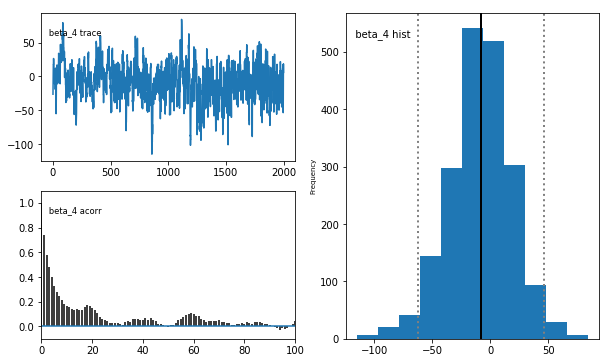

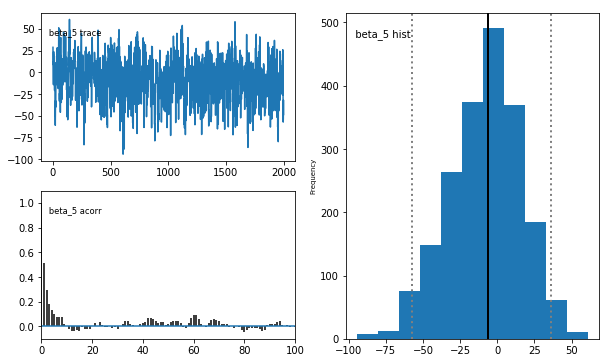

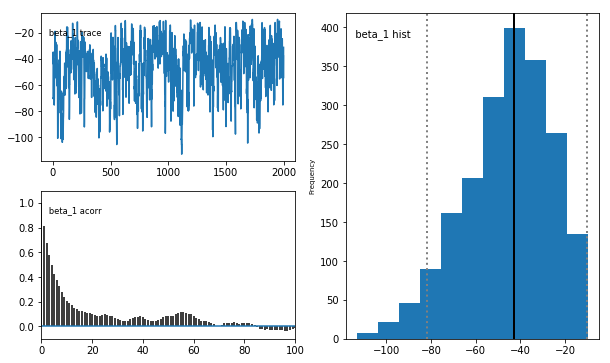

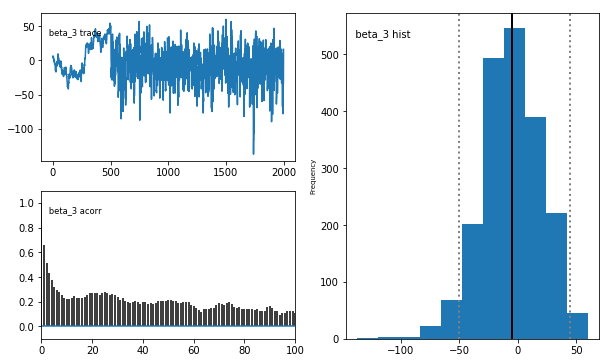

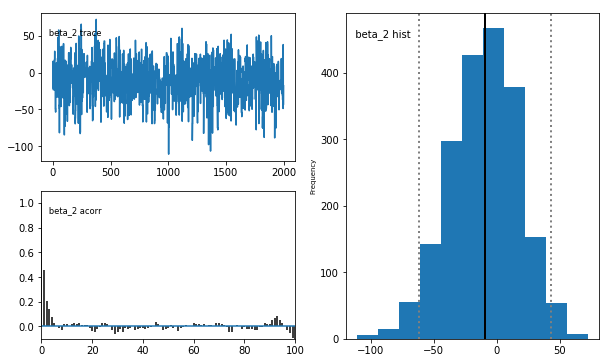

In [10]:
pymc.Matplot.plot(S)
None

In [5]:
S.DIC

306720.4347612143

In [6]:
import pymc3
import numpy as np
import pandas as pd
import theano.tensor as tt
import theano
from scipy import stats

/opt/intel/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
bills = pd.read_csv("BillsMXc.csv").sort_values("Year", axis=0)

In [8]:
with pymc3.Model() as model:
    beta = pymc3.Normal("beta", mu=0.0, tau=0.0001, shape=5)
    # mu=0.0, tau=0.0001,
    eta = pymc3.Deterministic("eta",
                              pymc3.math.invlogit(beta[0] + beta[1]*bills.x50.values + beta[2]*bills.x100.values +
                             beta[3]*bills.x200.values + beta[4]*bills.x500.values))
    p = pymc3.Deterministic("p", 
                            pymc3.math.exp(eta)/(1+pymc3.math.exp(eta)))
    yf = pymc3.Binomial("yf", p=p, n=bills.C.values, observed=bills.Y.values)
    step = pymc3.Metropolis([beta, p, yf])
    trace = pymc3.sample(draws=1000, tune=6000, chains=4, step=step, njobs=12, cores=4)

Multiprocess sampling (4 chains in 12 jobs)
Metropolis: [beta]
Sampling 4 chains: 100%|██████████| 28000/28000 [00:04<00:00, 6216.60draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


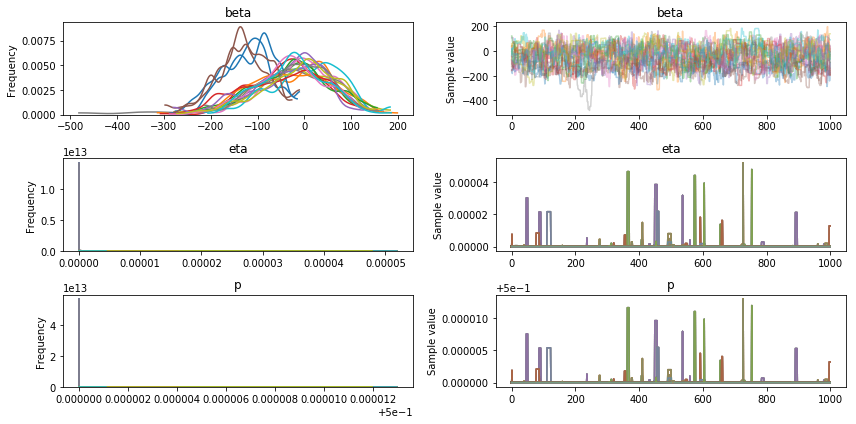

In [9]:
%matplotlib inline
pymc3.plots.traceplot(trace)
None

In [ ]:
with pymc3.Model() as model2:
    alpha = pymc3.Normal("alpha", mu=0.0, tau=0.0001)
    beta = pymc3.Normal("beta", mu=0.0, tau=0.0001, shape=5)
    # mu=0.0, tau=0.0001,
    eta = (pymc3.math.invlogit(alpha + beta[0]*bills.x20.values + beta[1]*bills.x50.values + beta[2]*bills.x100.values +
                                                  beta[3]*bills.x200.values + beta[4]*bills.x500.values))
    p = pymc3.Deterministic("p", 
                            pymc3.math.exp(eta)/(1+pymc3.math.exp(eta)))
    yf = pymc3.Binomial("yf", p=p, n=bills.C.values, observed=bills.Y.values)
#     step = pymc3.Metropolis([beta, p, yf])
    trace2 = pymc3.sample(draws=1000, tune=6000, chains=4, njobs=12, cores=4)

In [ ]:
%matplotlib inline
pymc3.plots.traceplot(trace2)
None

In [ ]:
print("Modelo sin alpha:")
pymc3.waic(trace, model)

In [ ]:
print("Modelo con alpha:") 
pymc3.waic(trace2, model2)

In [ ]:
pymc3.summary(trace2).round(4)